# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregue a base de dados
df = pd.read_csv('projeto_mod07.csv')

# Verifique o formato da base e os tipos de dados
print(df.info())

# Se houver variáveis categóricas em formato string, crie variáveis dummy
df = pd.get_dummies(df, drop_first=True)

# Divida a base em treinamento (70%) e validação (30%)
X = df.drop('mau', axis=1)  # Variáveis explicativas
y = df['mau']  # Variável resposta

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifique as formas dos conjuntos de treinamento e validação
print("Forma do conjunto de treinamento (X_train, y_train):", X_train.shape, y_train.shape)
print("Forma do conjunto de validação (X_val, y_val):", X_val.shape, y_val.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

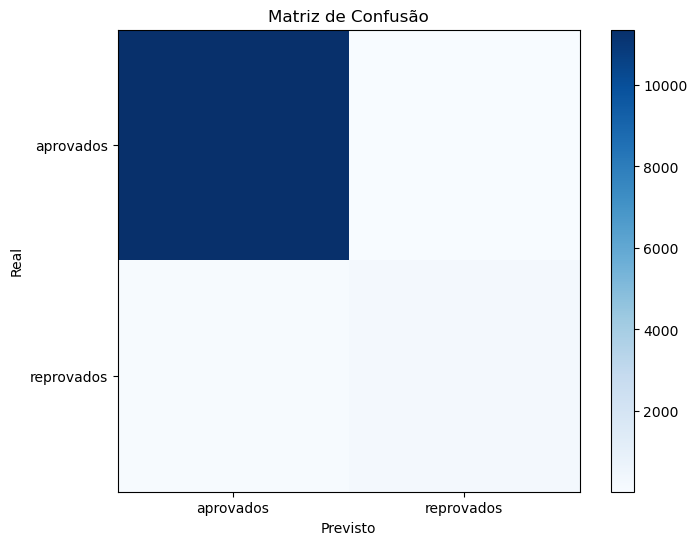

Acurácia na base de treinamento: 0.9912483912483913


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Crie o objeto da Árvore de Decisão
arvore_decisao = DecisionTreeClassifier(random_state=42)

# Treine o modelo com os dados de treinamento
arvore_decisao.fit(X_train, y_train)

# Produza a matriz de confusão
y_pred = arvore_decisao.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred)

# Visualize a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['aprovados', 'reprovados'])
plt.yticks(tick_marks, ['aprovados', 'reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Calcule a acurácia
accuracy = accuracy_score(y_train, y_pred)
print("Acurácia na base de treinamento:", accuracy)



#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Base de teste

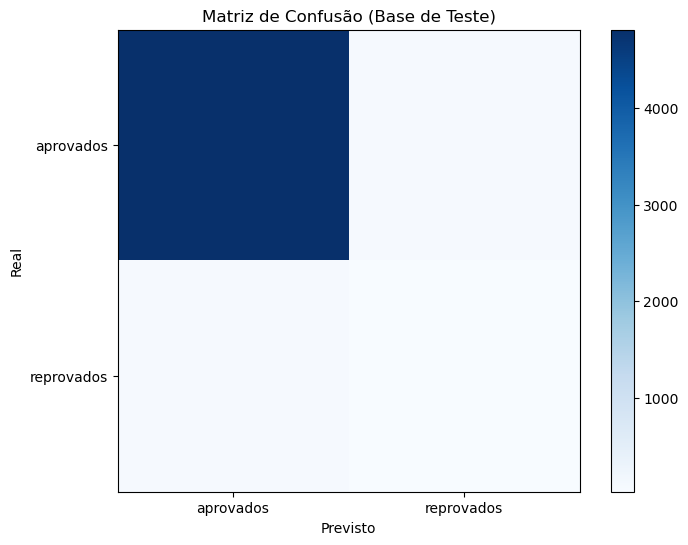

Acurácia na base de teste: 0.9691691691691692


In [25]:
# Classifique a base de teste com a árvore de decisão treinada
y_pred_test = arvore_decisao.predict(X_val)

# Produza a matriz de confusão para a base de teste
conf_matrix_test = confusion_matrix(y_val, y_pred_test)

# Visualize a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Base de Teste)')
plt.colorbar()
plt.xticks([0, 1], ['aprovados', 'reprovados'])
plt.yticks([0, 1], ['aprovados', 'reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Calcule a acurácia na base de teste
accuracy_test = accuracy_score(y_val, y_pred_test)
print("Acurácia na base de teste:", accuracy_test)


nova árvore com os hiperparâmetros especificados (min_samples_leaf=5, max_depth=10, random_state=123):

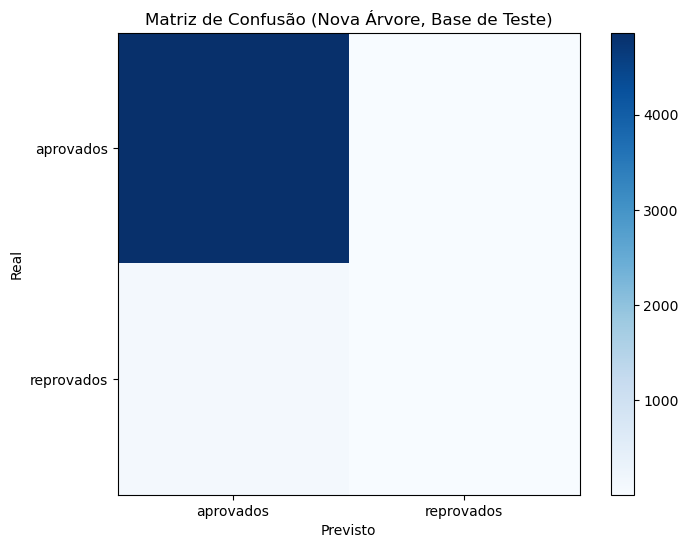

Acurácia na base de teste (Nova Árvore): 0.9751751751751752


In [27]:
# Treine uma nova árvore com hiperparâmetros específicos
nova_arvore_decisao = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
nova_arvore_decisao.fit(X_train, y_train)

# Classifique a base de teste com a nova árvore
y_pred_test_nova_arvore = nova_arvore_decisao.predict(X_val)

# Produza a matriz de confusão para a base de teste com a nova árvore
conf_matrix_test_nova_arvore = confusion_matrix(y_val, y_pred_test_nova_arvore)

# Visualize a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_test_nova_arvore, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Nova Árvore, Base de Teste)')
plt.colorbar()
plt.xticks([0, 1], ['aprovados', 'reprovados'])
plt.yticks([0, 1], ['aprovados', 'reprovados'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Calcule a acurácia na base de teste com a nova árvore
accuracy_test_nova_arvore = accuracy_score(y_val, y_pred_test_nova_arvore)
print("Acurácia na base de teste (Nova Árvore):", accuracy_test_nova_arvore)


Proporção de proponentes classificados como 'maus' e acurácia se todos os contratos fossem classificados como 'bons'

In [28]:
# Proporção de proponentes classificados como 'maus'
proporcao_maus = (y_pred_test_nova_arvore == 1).sum() / len(y_pred_test_nova_arvore)
print("Proporção de proponentes classificados como 'maus':", proporcao_maus)

# Acurácia se todos os contratos fossem classificados como 'bons'
acuracia_todos_bons = accuracy_score(y_val, [0] * len(y_val))
print("Acurácia se todos os contratos fossem classificados como 'bons':", acuracia_todos_bons)


Proporção de proponentes classificados como 'maus': 0.006406406406406407
Acurácia se todos os contratos fossem classificados como 'bons': 0.9783783783783784
